In [12]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import folium
from descartes import PolygonPatch
%matplotlib inline

In [13]:
locs = pd.read_csv("output.csv")
locs['ts'] = pd.to_datetime(locs['Time'])
geometry = [Point(xy) for xy in zip(locs.Longitude, locs.Latitude)]
locs['geometry'] = geometry
geolocs = gpd.GeoDataFrame(locs, crs={'init' : 'epsg:4326'}, geometry=geometry)

day = geolocs[geolocs.ts.dt.strftime('%m/%d/%Y').between('05/20/2017','05/21/2017')]

json = day.drop('ts', axis=1).to_json()

mapa = folium.Map([47, -122.783333],
                  zoom_start=7,
                  tiles='cartodbpositron')

points = folium.features.GeoJson(json)

mapa.add_children(points)

/Users/tony/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:17: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.


In [14]:
geolocs['ts'] = pd.to_datetime(geolocs.ts)
locs['ts'] = pd.to_datetime(locs.ts)

In [15]:
geolocs = geolocs.set_index(geolocs.ts)
locs = locs.set_index(locs.ts)

In [16]:
from shapely.geometry import LineString
thisyear = locs[(locs.index.year == 2017) & (locs.index.month == 5)]
thisyear = thisyear.groupby([thisyear.index.month, thisyear.index.day])['geometry'].apply(lambda x: LineString(list(x)))

In [17]:
df = gpd.GeoDataFrame(thisyear, geometry='geometry')

In [18]:
df.head(6)


geometry
5 1  LINESTRING (-122.3018748 47.6238816, -122.3015...
  2  LINESTRING (-122.3018919 47.6237651, -122.3013...
  3  LINESTRING (-122.3018587 47.6238058, -122.3018...
  4  LINESTRING (-122.3017126 47.6239934, -122.3014...
  5  LINESTRING (-122.3541673 47.6516463, -122.3541...
  6  LINESTRING (-122.2849645 47.60739229999999, -1...

In [19]:
json = df.to_json()

mapa = folium.Map([47, -122.783333],
                  zoom_start=7,
                  tiles='cartodbpositron')

points = folium.features.GeoJson(json)
mapa.add_child(points)

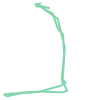

In [20]:
df.geometry[1]

In [21]:
df.geometry[17].bounds

(-122.31338390000002, 47.6237227, -122.2794563, 47.6685191)

In [22]:
thisyear = locs[locs.index.year == 2017]
days = thisyear.groupby([thisyear.index.month, thisyear.index.day])
days  = thisyear.groupby([thisyear.index.month, thisyear.index.day]).apply(lambda x: LineString(list(x)))

AssertionError: 

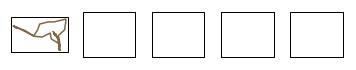

In [23]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def make_cartopy(projection=ccrs.Robinson(), figsize=(6, 4), resolution='110m'):
    fig, ax = plt.subplots(1,5,figsize=figsize, subplot_kw=dict(projection=projection))
    ax[0].coastlines(resolution=resolution, color='k')
    # Only PlateCarree and Mercator plots are currently supported.
    ax[0].add_feature(cfeature.LAND, facecolor='0.75')
    return fig, ax

fig, ax = plt.subplots(1,5, figsize=(6,4), subplot_kw=dict(projection=ccrs.Mercator()))
_ = ax[0].plot(*df.geometry[16].xy, color='#826644', transform=ccrs.Mercator())


In [31]:
def plot_month(month, extent, figsize):
    fig, ax = plt.subplots(5, int(len(month)/5), subplot_kw=dict(projection=ccrs.PlateCarree()), figsize=figsize)
    dayindex = 0
    ratio = 1.1
    minx, maxx, miny, maxy = extent[0], extent[2], extent[1], extent[3]
    for i in range(0, 5):
        for j in range(0,  int(len(month)/5)):
            dayindex += 1
            try:
                #ax[i][j].set_extent([minx, maxx, miny, maxy])
                ax[i][j].plot(*month[dayindex].xy, transform=ccrs.PlateCarree())
                #ax[i][j].gridlines()
                ax[i][j].set_title(dayindex)
#                 xvals,yvals = ax[i][j].get_xlim(),ax[i][j].get_ylim()

#                 xrange = xvals[1]-xvals[0]
#                 yrange = yvals[1]-yvals[0]
                #ax[i][j].set_aspect(ratio, adjustable='box')
            except ValueError: 
                break
    plt.tight_layout()
    return (fig, ax)



In [32]:
may = locs[(locs.index.year == 2017) & (locs.index.month == 5)].groupby(pd.TimeGrouper(freq='D'))['geometry'].apply(lambda x: LineString(list(x)))
global_extent = gpd.GeoSeries(may).total_bounds

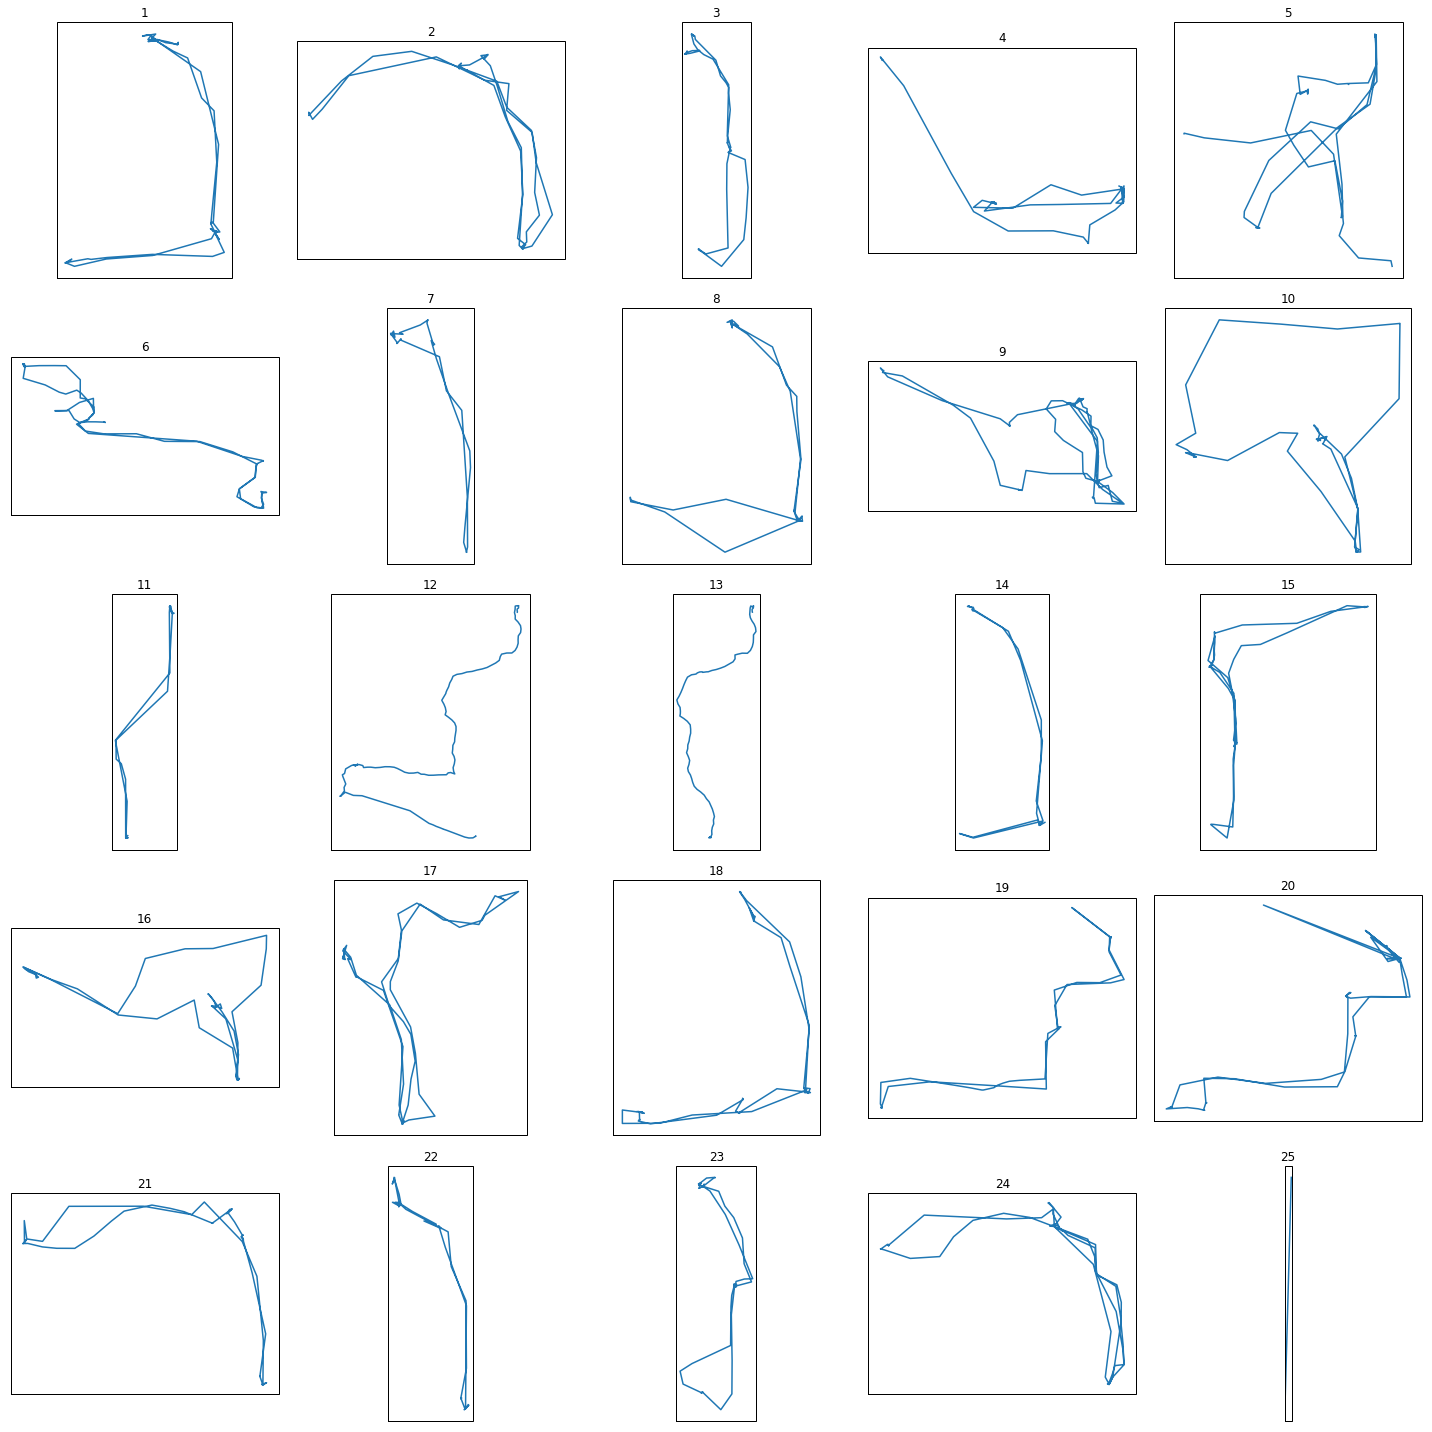

In [33]:
plt.rc("figure", figsize=(5,5))
fig, axes = plot_month(may, global_extent, (20, 20))

In [ ]:
may[0].xy

In [ ]:
global_